In [1]:
# Documentação
# https://python-twitter.readthedocs.io/en/latest/twitter.html#module-twitter.api

## Importando bibliotecas

In [2]:
!pip install python-twitter

In [3]:
import twitter
import json

In [4]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

## Configurando api

In [5]:
# Carregando o arquivo de configuração
with open('tokens.json') as f:
    data = json.load(f)

In [6]:
# Carregando a API do Twitter, utilizando os dados do arquivo json
api = twitter.Api(**data)

In [7]:
# Testar se tudo está certo

# Caso tiver alguma credencial errada, o resultado será:
#twitter.error.TwitterError: [{'code': 32, 'message': 'Could not authenticate you.'}]

print(api.VerifyCredentials())

{"created_at": "Tue Jul 26 22:26:37 +0000 2016", "default_profile": true, "default_profile_image": true, "friends_count": 1, "id": 758066017742512128, "id_str": "758066017742512128", "name": "Malu Freitas", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "MaluMalufrt"}


In [8]:
# A API do Twitter permite fazer diversos tipos de consultas. O retorno dessas consultas pode ser acessado facilmente. 

# Função que, a partir de uma lista de status, mostra o nome do usuário e o texto do twitter.

def print_status(status_list):
    for status in status_list:
        print('(' + str(status.created_at) + ') ' + str(status.user.name) + ':' + str(status.text) + '\n')

## Buscando dados do twitter

In [9]:
# Busca por termos

status_list = api.GetSearch(term="xiaomi",
                            lang='pt',
                            count=100,
                            result_type='mixed')

## Criando lista com os tweets

In [10]:
def cria_tweet_list(status_list):
    tweet_list = []
    
    for tweet in status_list:
        tweet_list.append(tweet.text)
    
    return tweet_list

In [11]:
# Printando elementos
print_status(status_list)

(Wed Oct 30 17:16:00 +0000 2019) Olhar Digital:A #Xiaomi mostrou a interface de seu novo smartwatch e como ele irá funcionar

https://t.co/fKQgfTcMTJ

(Tue Oct 29 15:31:01 +0000 2019) Xiaomi Brasil:Adivinhem quem está chegando! 👀 #XiaomiBrasil #mobilephotography #technology #Smartphones #Xiaomi https://t.co/WpZZOKxxzW

(Wed Oct 30 19:25:00 +0000 2019) Olhar Digital:A 5m de distância, as imagens captadas pela lente permitem ver até 5.3 com nitidez. Confira o vídeo:

https://t.co/ouosTx98Di

(Thu Oct 31 11:05:14 +0000 2019) Inferninho:Pai amado eu vou trocar meu celular em um xiaomi

(Thu Oct 31 11:03:01 +0000 2019) Cláudio Fernandes:O meu Xiaomi morreu 😢 de volta ao iPhone

(Thu Oct 31 11:02:54 +0000 2019) bundinha vegana:@LaraSalvador8 @aderlan_macario Xiaomi maior e melhor

(Thu Oct 31 11:01:35 +0000 2019) firmeza total:Tem algum fone de ouvido sem fio bom, sem ser o da xiaomi ou da Apple?

(Thu Oct 31 10:53:58 +0000 2019) Leo Silva:O amazem está o mesmo que todos os produtos Br 
P-10

In [12]:
print(len(status_list))

100


In [13]:
tweet_list = cria_tweet_list(status_list)

In [14]:
print(tweet_list)

['A #Xiaomi mostrou a interface de seu novo smartwatch e como ele irá funcionar\n\nhttps://t.co/fKQgfTcMTJ', 'Adivinhem quem está chegando! 👀 #XiaomiBrasil #mobilephotography #technology #Smartphones #Xiaomi https://t.co/WpZZOKxxzW', 'A 5m de distância, as imagens captadas pela lente permitem ver até 5.3 com nitidez. Confira o vídeo:\n\nhttps://t.co/ouosTx98Di', 'Pai amado eu vou trocar meu celular em um xiaomi', 'O meu Xiaomi morreu 😢 de volta ao iPhone', '@LaraSalvador8 @aderlan_macario Xiaomi maior e melhor', 'Tem algum fone de ouvido sem fio bom, sem ser o da xiaomi ou da Apple?', 'O amazem está o mesmo que todos os produtos Br \nP-1000 👇👇\nXiaomi Redmi Note 6 Pro Global Version 6.26 inch 4GB 64GB… https://t.co/SVreY4ftak', 'Painho é o usuário de xiaomi mais chato da face da terra.... olhe, sem condições.', '@sailor_nebula Um vício chamado \nNão morrer de fome e comprar um xiaomi novo', '@lucasmzanella @felipeneto Xiaomi ainda é para amadores. Vai de OnePlus', 'Xiaomi divulga vídeo

In [15]:
for i in tweet_list:
    print("'" + str(i) + "'")
    print('----------------------------------------------------------------------------------------------------------------')

'A #Xiaomi mostrou a interface de seu novo smartwatch e como ele irá funcionar

https://t.co/fKQgfTcMTJ'
----------------------------------------------------------------------------------------------------------------
'Adivinhem quem está chegando! 👀 #XiaomiBrasil #mobilephotography #technology #Smartphones #Xiaomi https://t.co/WpZZOKxxzW'
----------------------------------------------------------------------------------------------------------------
'A 5m de distância, as imagens captadas pela lente permitem ver até 5.3 com nitidez. Confira o vídeo:

https://t.co/ouosTx98Di'
----------------------------------------------------------------------------------------------------------------
'Pai amado eu vou trocar meu celular em um xiaomi'
----------------------------------------------------------------------------------------------------------------
'O meu Xiaomi morreu 😢 de volta ao iPhone'
-------------------------------------------------------------------------------------------------

## Remove os tweets duplicados

In [16]:
lista_sem_duplicados = list(set(tweet_list))

In [17]:
print(type(lista_sem_duplicados))

<class 'list'>


In [18]:
print(len(tweet_list))

100


In [19]:
print(len(lista_sem_duplicados))

96


In [20]:
print(lista_sem_duplicados)

['RT @stufflistings: Mi CC9 Pro super macro mode.\n#Xiaomi #redmi #cc9pro #mismartwatch #MiTV5 #MiNote10 https://t.co/WYOVSWWqX1', '@thiagochareti Quando seu xiaomi chegar @Ment0sbtw', '@AlicePA olha eu não sei nada de xiaomi e daqui a pouco as testemunhas vem explicar mas tem uns modelos aí que tem… https://t.co/PItvvwIpau', 'Redmi Note 8 Pro vem aí: Xiaomi marca lançamento no Brasil em 7 de novembro https://t.co/xkAAkLV18x https://t.co/ZpiyJl15Pl', 'Aberto até de Madrugada: Xiaomi Mi CC9 Pro mostra a câmara de 108MP https://t.co/V0VlRpyOIC', 'poxa testemunhas de xiaomi vcs me prometeram', 'Ninguém:\n\nUsuário de xiaomi: COMPRE XIAOMI CARA, MUITO MELHOR QUE IPHONE E SUPER BARATO', 'Xiaomi Mi Note 10 tem data de lançamento oficial na Europa! https://t.co/p1rYg8ASW3 https://t.co/HDROLxFRwX', 'Agr até minha mãe tem um Xiaomi, o mundo segue avançando pra dominação', '@nubank quero comprar logo meu Xiaomi tem como vocês entregar logo meu cartão?', 'Preço Mínimo Drone Xiaomi Fimi X8 de\xa04

In [21]:
print(tweet_list)

['A #Xiaomi mostrou a interface de seu novo smartwatch e como ele irá funcionar\n\nhttps://t.co/fKQgfTcMTJ', 'Adivinhem quem está chegando! 👀 #XiaomiBrasil #mobilephotography #technology #Smartphones #Xiaomi https://t.co/WpZZOKxxzW', 'A 5m de distância, as imagens captadas pela lente permitem ver até 5.3 com nitidez. Confira o vídeo:\n\nhttps://t.co/ouosTx98Di', 'Pai amado eu vou trocar meu celular em um xiaomi', 'O meu Xiaomi morreu 😢 de volta ao iPhone', '@LaraSalvador8 @aderlan_macario Xiaomi maior e melhor', 'Tem algum fone de ouvido sem fio bom, sem ser o da xiaomi ou da Apple?', 'O amazem está o mesmo que todos os produtos Br \nP-1000 👇👇\nXiaomi Redmi Note 6 Pro Global Version 6.26 inch 4GB 64GB… https://t.co/SVreY4ftak', 'Painho é o usuário de xiaomi mais chato da face da terra.... olhe, sem condições.', '@sailor_nebula Um vício chamado \nNão morrer de fome e comprar um xiaomi novo', '@lucasmzanella @felipeneto Xiaomi ainda é para amadores. Vai de OnePlus', 'Xiaomi divulga vídeo

## Coloca os tweets da lista em um arquivo .csv

In [22]:
def cria_arquivo_csv(lista):
    arquivo = open('xiaomi.csv', 'w', encoding='utf-8')
    
    for pos_tweet in range(len(lista)):
        arquivo.write('"' + str(lista[pos_tweet]) + '"')
        arquivo.write('\n')
        
    arquivo.close()

In [23]:
cria_arquivo_csv(lista_sem_duplicados)

In [24]:
cria_arquivo_csv(tweet_list)

## Cria um data frame

In [25]:
# Criando data frame
#df2 = pd.read_csv('classificado_tweets_mi_band_4.csv', encoding='utf-8')
df = pd.read_csv('classificado_xiaomi.csv', encoding='utf-8')

In [26]:
#df = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [27]:
df.head()

,tweets,classes
0,Agr até eu quero um xiaomi,positivo
1,xiaomi= tudo pra mim. https://t.co/7lAvXTxa2J,positivo
2,RT @karnsteins: meu celular está 1 dia e 6 hor...,positivo
3,@Juliano_Fleck Se procura aplicativo usa o Sma...,positivo
4,@paginamemebro nn gosto da câmera do xiaomi,negativo


In [28]:
tweets = df['tweets']
classes = df['classes']

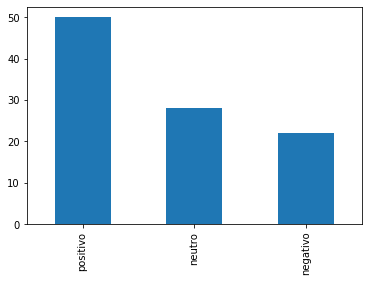

In [29]:
%matplotlib inline
df.classes.value_counts().plot(kind='bar')

In [30]:
#%matplotlib inline
#df2.classes.value_counts().plot(kind='bar')

## Limpeza dos dados

In [31]:
# Para limpeza dos dados
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(',','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    stopwords.remove('não')
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

## Tokenização

In [33]:
from nltk.tokenize import TweetTokenizer

In [34]:
tweet_tokenizer = TweetTokenizer()

## Vetorização - Bag of words

In [35]:
# Instancia o objeto que faz a vectorização
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

In [36]:
# Aplica o vetorizador nos dados
# Ajuste o modelo SVM de acordo com os dados de treinamento fornecidos.
freq_tweets = vectorizer.fit_transform(tweets[:11])
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [37]:
# Formato linha, coluna da matriz
freq_tweets.shape

(11, 80)

In [38]:
modelo = svm.SVC(gamma='auto')

In [39]:
modelo.fit(freq_tweets,classes[:11])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
freq_tweets.A

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0

## Testando o modelo

In [41]:
import random
lista_teste = []
for i in range(20):
    pos = random.randint(0,99)
    print(pos)
    lista_teste.append(tweets[pos])

26
95
76
45
49
98
42
4
26
66
10
35
67
56
1
26
62
85
63
68


In [42]:
testes = [Preprocessing(i) for i in lista_teste]

In [43]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [44]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

rt @selenaffection obrig mim @xiaom, positivo
silenc palavr xiaom vid, positivo
xiaom dev lanç redm not 8 pro brasil, positivo
fim ach cap pro xiaom 🥰📳, positivo
@obrasilfabian @bitchoffs @renanwr fot viag tud xiaom jog pokemon bat dur afu, positivo
não compr xiaom mi 9t via @youtub, positivo
mãe compr iphon pra aq merd xiaom ai, positivo
@paginamemebr nn gost câm xiaom, positivo
rt @selenaffection obrig mim @xiaom, positivo
@lopofern @jotaplay xiaom amigo?, positivo
compr xiaom vou vir palestrante?, positivo
preç mín dron xiaom fim x8 423€, positivo
xiaomi?, positivo
alguém sab fon jbl melhor xiaomi?, positivo
xiaomi= tud pra mim, positivo
rt @selenaffection obrig mim @xiaom, positivo
@douglas65127353 xiaom horr, positivo
obrig xiaom ser melhor celul vid, positivo
#xiaom mostr interfac nov smartwatch irá funcion, positivo
@teucontat ach xiaomi!, positivo


In [45]:
tweets_execucao = [Preprocessing(i) for i in tweets]

In [46]:
freq_testes = vectorizer.transform(tweets_execucao)

In [47]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (tweets_execucao,modelo.predict(freq_testes)):
    print (t +", "+ c)

agr qu xiaom, positivo
xiaomi= tud pra mim, positivo
rt @karnsteim celul 1 dia 6 hor carreg aind to c 17% ouv músic fon bluetooth jog ff xiaom ob…, positivo
@juliano_fleck proc aplic usa smart iptv tv box xiaom excel, positivo
@paginamemebr nn gost câm xiaom, positivo
3 dia 9 hor 30 min carreg xiaom cont comig pra tud, positivo
começ époc chuv vou compr guardachuv xiaom melhor barat outr, positivo
@tabatabatat agr vai ter aguent us io ch xiaominion kkk (tod mund sab xiaom melhor 🤫, positivo
cam xiaom boa?, positivo
@jackstarving car ia compr não compr xiaom, positivo
compr xiaom vou vir palestrante?, positivo
@tockerslol xiaom melhor, positivo
@breandu nad xiaom melhor qualqu form, positivo
gent xiaom fal melhor ?, positivo
@bruso__ olá fiq sab xiaom nov ai rs rs, positivo
gast rio dinh atualiz iphon 2020 sist gost peg xiaom mi…, positivo
cert admit vic produt xaom vou compr mi band 4 xiaom mi 8 lit redm airdots…, positivo
@xiaomibrasil sai mi band 4 brasil???, positivo
compr smartwatc

## Criando modelos com Pipelines

In [48]:
# Pipelines são interessantes para reduzir código e automatizar fluxos
from sklearn.pipeline import Pipeline

In [49]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [50]:
pip_rbf = Pipeline([
('counts',CountVectorizer()),
('classifier', svm.SVC(kernel='rbf'))
])

pip_poly = Pipeline([
('counts',CountVectorizer()),
('classifier', svm.SVC(kernel='poly'))
])

## Validando os Modelos com Validação Cruzada

In [115]:
# Fazendo o cross validation do modelo
resultados = cross_val_predict(pipeline_svm_simples, tweets_execucao, classes, cv=50)

c:\users\maluf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 22 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


In [131]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.62

In [98]:
# Medidas de validação do modelo
sentimento=['positivo','negativo','neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    positivo       0.65      0.84      0.73        50
    negativo       0.57      0.36      0.44        22
      neutro       0.57      0.43      0.49        28

    accuracy                           0.62       100
   macro avg       0.60      0.54      0.55       100
weighted avg       0.61      0.62      0.60       100



In [54]:
# Matriz de confusão
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   negativo  neutro  positivo  All
Real                                     
negativo         8       3        11   22
neutro           3      11        14   28
positivo         2       6        42   50
All             13      20        67  100


In [117]:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets_execucao, classes, cv=50)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [118]:
# svm linear simples
Metricas(pipeline_svm_simples,tweets_execucao,classes)

c:\users\maluf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 22 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


'Acurácia do modelo: 0.62'

In [57]:
#Testes

In [127]:
medias = cross_val_score(pipeline_svm_simples, tweets_execucao, classes, cv=50)
media = sum(medias) / len(medias)

c:\users\maluf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 22 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


In [128]:
medias

array([0.33333333, 0.33333333, 0.66666667, 0.33333333, 1.        ,
       0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.33333333,
       0.66666667, 0.66666667, 0.        , 0.33333333, 0.66666667,
       1.        , 0.33333333, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.        , 1.        , 1.        , 0.5       ,
       0.5       , 0.5       , 0.5       , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ])

In [129]:
media

0.7066666666666666